# Implement a Neural Network for Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import os 
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import time

## Part 1. Build DataFrame and Define ML Problem


#### Load a Data Set and Save it as a Pandas DataFrame

We will work with the book review data set that contains book reviews taken from Amazon.com reviews.

In [2]:
filename = os.path.join(os.getcwd(), "..", "data", "bookReviews.csv")
df = pd.read_csv(filename, header=0)

#### Inspect the Data

In [3]:
print(df.shape)
print(df.columns)
print(df.head(10))

(1973, 2)
Index(['Review', 'Positive Review'], dtype='object')
                                              Review  Positive Review
0  This was perhaps the best of Johannes Steinhof...             True
1  This very fascinating book is a story written ...             True
2  The four tales in this collection are beautifu...             True
3  The book contained more profanity than I expec...            False
4  We have now entered a second time of deep conc...             True
5  I don't know why it won the National Book Awar...            False
6  The daughter of a prominent Boston doctor is d...            False
7  I was very disapointed in the book.Basicly the...            False
8  I think in retrospect I wasted my time on this...            False
9  I have a hard time understanding what it is th...            False


#### Define the Label

This is a binary classification problem in which we will predict whether a book review is a positive or negative one. The label is the `Positive Review` column.

#### Identify Features

We only have one feature. The feature is the `Review` column.


## Part 2. Create Labeled Examples from the Data Set 

In [4]:

X = df["Review"]
y = df["Positive Review"]
X.shape

(1973,)

## Part 3. Create Training and Test Data Sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

## Part 4:  Implement TF-IDF Vectorizer to Transform Text


In the code cell below, we will transform the features into numerical vectors using `TfidfVectorizer`. 

In [6]:
# 1. Create a TfidfVectorizer object 
tfidf_vectorizer = TfidfVectorizer()

# 2. Fit the vectorizer to X_train
tfidf_vectorizer.fit(X_train)

# 3. Using the fitted vectorizer, transform the training data 
X_train_tfidf = tfidf_vectorizer.transform(X_train)

# 4. Using the fitted vectorizer, transform the test data 
X_test_tfidf = tfidf_vectorizer.transform(X_test)

When constructing our neural network, we will have to specify the `input_shape`, meaning the dimensionality of the input layer. This corresponds to the dimension of each of the training examples, which in our case is our vocabulary size. Run the code cell below to see the vocabulary size.


In [7]:
vocabulary_size = len(tfidf_vectorizer.vocabulary_)

print(vocabulary_size)

18558


## Part 5: Construct a Neural Network


### Step 1.  Define Model Structure

Next we will create our neural network structure. We will create an input layer, three hidden layers and an output layer:

* <b>Input layer</b>: The input layer will have the input shape corresponding to the vocabulary size. 
* <b>Hidden layers</b>: We will create three hidden layers, with 64, 32, and 16 units (number of nodes) respectively. Each layer will utilize the ReLU activation function. 
* <b>Output layer</b>: The output layer will have 1 unit. The output layer will utilize the sigmoid activation function. Since we are working with binary classification, we will be using the sigmoid activation function to map the output to a probability between 0.0 and 1.0. We can later set a threshold and assume that the prediction is class 1 if the probability is larger than or equal to our threshold, or class 0 if it is lower than our threshold.

In [8]:
# 1. Create model object
nn_model = keras.Sequential()

# 2. Create the input layer and add it to the model object: 
input_shape = X_train_tfidf.shape
input_layer = keras.layers.InputLayer((input_shape[1],))
nn_model.add(input_layer)

# 3. Create the first hidden layer and add it to the model object:
hidden_layer_1 = keras.layers.Dense(units=64, activation='relu')
nn_model.add(hidden_layer_1)
nn_model.add(keras.layers.Dropout(.25))

# 4. Create the second layer and add it to the model object:
hidden_layer_2 = keras.layers.Dense(units=32, activation='relu')
nn_model.add(hidden_layer_2)
nn_model.add(keras.layers.Dropout(.25))

# 5. Create the third layer and add it to the model object:
hidden_layer_3 = keras.layers.Dense(units=16, activation='relu')
nn_model.add(hidden_layer_3)
nn_model.add(keras.layers.Dropout(.25))

# 6. Create the output layer and add it to the model object:
output_layer = keras.layers.Dense(units=1, activation='sigmoid')
nn_model.add(output_layer)

# Print summary of neural network model structure
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │     1,187,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,190,401 (4.54 MB)

 Trainable params: 1,190,401 (4.54 MB)

 Non-trainable params: 0 (0.00 B)

### Step 2. Define the Optimization Function

In [9]:
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)

### Step 3. Define the Loss Function

In [10]:
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)

### Step 4. Compile the Model

In [11]:
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

## Part 6. Fit the Model on the Training Data

We will define our own callback class to output information from our model while it is training. Make sure you execute the code cell below so that it can be used in subsequent cells.

In [12]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))


In [13]:
t0 = time.time() # start time

num_epochs = 30 # epochs

history = nn_model.fit(X_train_tfidf.toarray(), y_train, epochs=num_epochs, verbose=0, callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)], validation_split=0.2)

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 30], Accuracy: 0.5495, Loss: 0.6875, Val_accuracy: 0.5845, Val_loss: 0.6872
Epoch [10/ 30], Accuracy: 0.6813, Loss: 0.6412, Val_accuracy: 0.7736, Val_loss: 0.6418
Epoch [15/ 30], Accuracy: 0.7473, Loss: 0.5336, Val_accuracy: 0.6014, Val_loss: 0.6284
Epoch [20/ 30], Accuracy: 0.8276, Loss: 0.4309, Val_accuracy: 0.8007, Val_loss: 0.4835
Epoch [25/ 30], Accuracy: 0.8470, Loss: 0.3738, Val_accuracy: 0.7872, Val_loss: 0.4485
Epoch [30/ 30], Accuracy: 0.8918, Loss: 0.3160, Val_accuracy: 0.8176, Val_loss: 0.3834
Elapsed time: 10.41s


In [14]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### Visualize the Model's Performance Over Time

The code below outputs both the training loss and accuracy and the validation loss and accuracy. Let us visualize the model's performance over time:

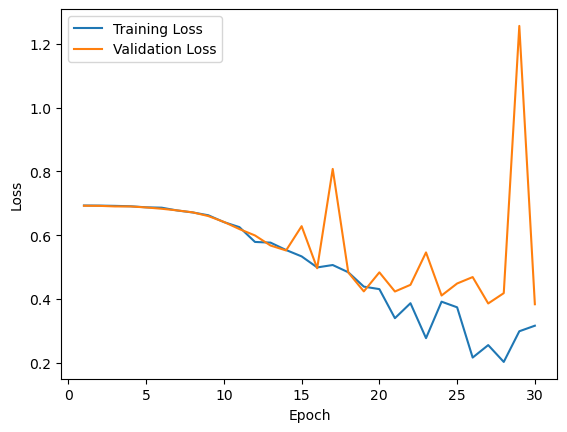

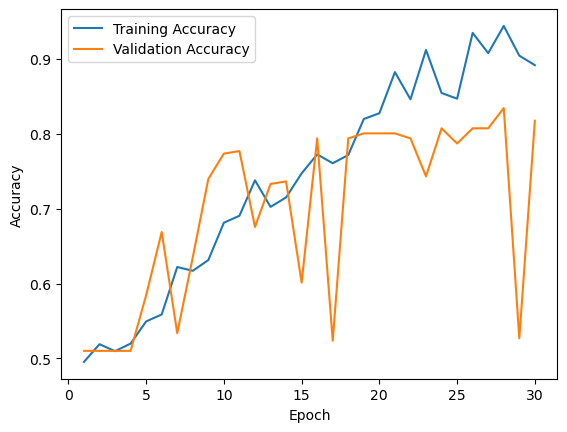

In [15]:
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Part 7. Evaluate the Model's Performance

### Improve Model's Performance and Prevent Overfitting 

Neural networks can be prone to overfitting. Notice that the training accuracy is 100% but the validation accuracy is around 80%. This indicates that our model is overfitting; it will not perform as well on new, previously unseen data as it did during training. We want to have an accurate idea of how well our model will generalize to new data. Our goal is to have our training and validation accuracy scores be as close as possible.

While there are different techniques that can be used to prevent overfitting, for the purpose of this exercise we will focus on two methods:

1. Changing the number of epochs. Too many epochs can lead to overfitting of the training dataset, whereas too few epochs may result in underfitting.

2. Adding dropout regularization. During training, the nodes of a particular layer may always become influenced only by the output of a particular node in the previous layer, causing overfitting. Dropout regularization is a technique that randomly drops a number of nodes in a neural network during training as a way of adding randomization and preventing nodes from becoming dependent on one another. Adding dropout regularization can reduce overfitting and also improve the performance of the model. 

### Evaluate the Performance on the Test Set

In [16]:
loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test)

print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8394 - loss: 0.3974 
Loss:  0.3993627429008484 Accuracy:  0.8259109258651733


### Make Predictions on the Test Set

Now that we have our best performing model that can generalize to new, previously unseen data, let us make predictions using our test data.

In the cell below, we will make a prediction on our test set and receive probability predictions for every example in the test set (these values will be between 0.0 and 1.0). We will then inspect the results for the first 20 examples &mdash; We will apply a threshold to determine the predicted class for every example; we will use a threshold of 0.5. This means that if the probability is greater than 0.5, we will assume the book review is good. We will then print the actual class labels contained in `y_test` to see if our model is producing accurate predictions.

In [17]:
# Make predictions on the test set
probability_predictions = nn_model.predict(X_test_tfidf.toarray())

print("Predictions for the first 20 examples:")
for i in range(20):
    if probability_predictions[i] > 0.5:
        print(probability_predictions[i], y_test.to_numpy()[i])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Predictions for the first 20 examples:
[0.91550756] False
[0.8042938] True
[0.5553103] True
[0.87117016] True
[0.70340633] False
[0.9422399] True
[0.91855925] True
[0.7852768] True
[0.6255431] False
[0.9109383] True
[0.91928333] True
[0.8807099] False
[0.8705316] True
[0.80025506] True
[0.58689564] True


Let's check a few of the original book review texts to get a further glimpse into how our model is performing.

In [18]:
print('Review #1:\n')

print(X_test.to_numpy()[11])

goodReview = True if probability_predictions[11] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[11]))

Review #1:

Thriller and mystery readers like to guess along with our protagonists when we're reading a story.  We like to look for clues in what we've read to help us unravel the plot, and find out who did it and why the crime was done.

John Grisham cheats us out of that fun.  The villian of this book isn't introduced until there less than 75 pages left, which means that when you get that far, you realize that everything you read before then wasn't valid. To have some red herrings in a thriller is fine, but to have 300 pages of chases and red herrings?  That's bad.

Read another thriller instead of this one, one that plays by the rules


Prediction: Is this a good review? True

Actual: Is this a good review? False



In [19]:
print('Review #2:\n')

print(X_test.to_numpy()[24])

goodReview = True if probability_predictions[24] >= .5 else False

print('\nPrediction: Is this a good review? {}\n'.format(goodReview)) 

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[24]))

Review #2:

I have read Baldacci's first four novels and have immensely enjoyed all of them.  This one, however, is just awful.  Not only the character's dialogue but even the story itself is written like a really bad detective movie.  The only thing I can think of to compare it to is this :  There was a series of Calvin and Hobbes cartoons where Calvin imagines himself as a private detective and they are written like the old detective shows, with lame lines like "The gun was loaded, and so was I".  That is exactly what this book is like, except it goes on for 400 pages.  There isn't a single interesting character in this book, in my opinion.  You just have to slog your way through the book to get to the end.  It's the Bataan Death March of novels.  I hope this is an aberration - I'll certainly give him another try since the first four novels that I read were so good.  But one more stinker like this one and I'll drop his name from my reading list


Prediction: Is this a good review? Fa

In [20]:
print('Review #3:\n')

print(X_test.to_numpy()[56])

goodReview = True if probability_predictions[56] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[56]))

Review #3:

This commentary has many tremendous insights into the book of Romans.  Romans is one of the richest resources of truth within the Bible and John Stoot does a good job of unpacking it.  The book is written from a framework of the reader having a strong prior understanding of the Scriptures.  It is probably not considered a highly scholarly work, but it is not for the average reader to pick up for light reading either


Prediction: Is this a good review? True

Actual: Is this a good review? True



In [21]:
print('Review #4:\n')
print(X_test.to_numpy()[102])

goodReview = True if probability_predictions[102] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[102]))

Review #4:

With astute attention to the details of character, setting and daily life, Susan Kelly illuminates the ordinary. Pondering love, memory, faith,and responsiblity, Kelly transforms the everyday into the quintessential. This is a beautifully rendered story


Prediction: Is this a good review? True

Actual: Is this a good review? True

